In [6]:
!pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


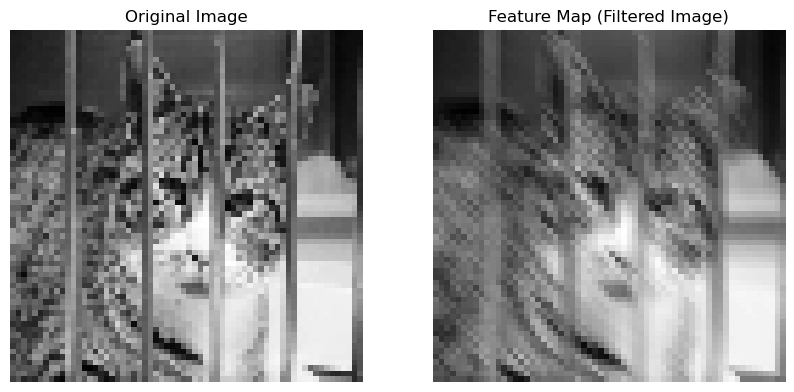

Feature map shape: (62, 62)
The filter detects diagonal patterns (from top-left to bottom-right).


In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    image = cv2.resize(image, (64, 64)) 
    image = image.astype(np.float32) / 255.0
    return image

image_path = "C:\\Users\\Dharani Ravi\\Pictures\\WhatsApp Image 2025-03-04 at 10.19.02_e1a2f258.jpg" 
image = load_image(image_path)

filter_3x3 = np.array([[1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1]], dtype=np.float32)

kernel = filter_3x3.reshape(3, 3, 1, 1)

image_tensor = tf.convert_to_tensor(image.reshape(1, 64, 64, 1), dtype=tf.float32)
kernel_tensor = tf.convert_to_tensor(kernel, dtype=tf.float32)

feature_map = tf.nn.conv2d(image_tensor, kernel_tensor, strides=[1, 1, 1, 1], padding='VALID')

feature_map = feature_map.numpy().squeeze()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map (Filtered Image)")
plt.axis("off")

plt.show()

print("Feature map shape:", feature_map.shape)
print("The filter detects diagonal patterns (from top-left to bottom-right).")
